# Ovarian Cancer Prediction Project
- here using blood biomarker approach
- main is feature selection part for classification problems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_excel("Supplementary data 1.xlsx")
df.head()

SUBJECT_ID      AFP     AG  Age   ALB   ALP   ALT   AST  BASO#  BASO%  ...  \
0           1   3.58\t  19.36   47  45.4  56.0  11.0  24.0   0.01   0.30  ...   
1           2  34.24\t  23.98   61  39.9  95.0   9.0  13.0   0.02   0.30  ...   
2           3   1.50\t  18.40   39  45.4  77.0   9.0  18.0   0.03   0.60  ...   
3           4     2.75  16.60   45  39.2  26.0  16.0  17.0   0.05   0.74  ...   
4           5     2.36  19.97   45  35.0  47.0  21.0  27.0   0.01   0.10  ...   

    NEU   PCT   PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA  
0  76.2  0.09  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4  
1  76.5  0.30  11.2  1.09  304  4.89  12.7   6.8  72.0  119.2  
2  69.7  0.13  15.2  0.97  112  4.62  12.0  14.8  77.9  209.2  
3  65.5  0.25  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6  
4  59.5  0.28  11.9  0.94  272  4.40  13.4   5.3  66.5  206.0  

[5 rows x 51 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         327 non-null    object 
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       332 non-null    object 
 13  CA19-9      325 non-null    object 
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349 non-null    i

In [4]:
print(df.shape)

(349, 51)


In [5]:
df.loc[df['AFP'] == '>1210.00', 'AFP'] = '1210.00'
df.loc[df['AFP'] == '>1210', 'AFP'] = '1210.00'
df.loc[df['CA125'] == '>5000.00', 'CA125'] = '5000.00'
df.loc[df['CA125'] == '>5000.00\t', 'CA125'] = '5000.00'
df.loc[df['CA19-9'] == '>1000.00', 'CA19-9'] = '1000.00'
df.loc[df['CA19-9'] == '>1000', 'CA19-9'] = '1000.00'
df.loc[df['CA19-9'] == '<0.600', 'CA19-9'] = '0.5'
df.loc[df['CA19-9'] == '>1000\t', 'CA19-9'] = '1000.00'

In [6]:
df['AFP']=df['AFP'].astype(float)

In [7]:
df['CA19-9']=df['CA19-9'].astype(float)

In [8]:
df['CA125']=df['CA125'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         327 non-null    float64
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       332 non-null    float64
 13  CA19-9      325 non-null    float64
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349 non-null    i

In [10]:
missing = df.isnull().mean()
missing

SUBJECT_ID    0.000000
AFP           0.063037
AG            0.002865
Age           0.000000
ALB           0.028653
ALP           0.028653
ALT           0.028653
AST           0.028653
BASO#         0.000000
BASO%         0.000000
BUN           0.000000
Ca            0.000000
CA125         0.048711
CA19-9        0.068768
CA72-4        0.687679
CEA           0.063037
CL            0.000000
CO2CP         0.002865
CREA          0.000000
TYPE          0.000000
DBIL          0.028653
EO#           0.000000
EO%           0.000000
GGT           0.028653
GLO           0.028653
GLU.          0.000000
HCT           0.000000
HE4           0.057307
HGB           0.000000
IBIL          0.028653
K             0.000000
LYM#          0.000000
LYM%          0.000000
MCH           0.000000
MCV           0.000000
Menopause     0.000000
Mg            0.000000
MONO#         0.000000
MONO%         0.000000
MPV           0.005731
Na            0.000000
NEU           0.260745
PCT           0.005731
PDW        

In [11]:
missingDF = df.copy()

In [12]:
df.drop("CA72-4", inplace = True, axis = 1)
# removing CA72-4 as it has more than 50% missing value

In [13]:
df.drop('SUBJECT_ID', axis = 1, inplace = True)

In [14]:
df['TYPE']

0      0
1      0
2      0
3      0
4      0
      ..
344    1
345    1
346    1
347    1
348    1
Name: TYPE, Length: 349, dtype: int64

## Feature Selection


In [15]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('TYPE', axis = 1)
y = df['TYPE']
model = RandomForestClassifier(n_estimators=100, criterion='entropy')
model.fit(X, y)

selected_col = model.feature_importances_
print(selected_col)

[0.01604112 0.00852262 0.05173001 0.03337069 0.01887249 0.00785835
 0.01569692 0.00492062 0.00822319 0.0095824  0.00877177 0.08743451
 0.02641836 0.04070236 0.00894296 0.01127268 0.0093057  0.00983017
 0.00614287 0.00774877 0.00918708 0.01805175 0.0111817  0.00948494
 0.2032669  0.01004809 0.01406428 0.00700301 0.01493683 0.01779317
 0.01151901 0.00559362 0.02345573 0.00836827 0.00987666 0.00991517
 0.01235691 0.01159041 0.10866554 0.01039905 0.01522259 0.00846758
 0.0140865  0.00786922 0.00837078 0.00955077 0.01315671 0.00512917]


In [16]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': selected_col
})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

      Feature  Importance
24        HE4    0.203267
38        NEU    0.108666
11      CA125    0.087435
2         Age    0.051730
13        CEA    0.040702
3         ALB    0.033371
12     CA19-9    0.026418
32  Menopause    0.023456
4         ALP    0.018872
21        GLO    0.018052
29       LYM%    0.017793
0         AFP    0.016041
6         AST    0.015697
40        PDW    0.015223
28       LYM#    0.014937
42        PLT    0.014086
26       IBIL    0.014064
46         TP    0.013157
36        MPV    0.012357
37         Na    0.011590
30        MCH    0.011519
15      CO2CP    0.011273
22       GLU.    0.011182
39        PCT    0.010399
25        HGB    0.010048
35      MONO%    0.009915
34      MONO#    0.009877
17       DBIL    0.009830
9         BUN    0.009582
45       TBIL    0.009551
23        HCT    0.009485
16       CREA    0.009306
20        GGT    0.009187
14         CL    0.008943
10         Ca    0.008772
1          AG    0.008523
41       PHOS    0.008468
44        RD

In [17]:
featureSel = feature_importances.head(15)['Feature'].tolist()
print(featureSel)

['HE4', 'NEU', 'CA125', 'Age', 'CEA', 'ALB', 'CA19-9', 'Menopause', 'ALP', 'GLO', 'LYM%', 'AFP', 'AST', 'PDW', 'LYM#']


In [18]:
X_select = X[featureSel]
X_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HE4        329 non-null    float64
 1   NEU        258 non-null    float64
 2   CA125      332 non-null    float64
 3   Age        349 non-null    int64  
 4   CEA        327 non-null    float64
 5   ALB        339 non-null    float64
 6   CA19-9     325 non-null    float64
 7   Menopause  349 non-null    int64  
 8   ALP        339 non-null    float64
 9   GLO        339 non-null    float64
 10  LYM%       349 non-null    float64
 11  AFP        327 non-null    float64
 12  AST        339 non-null    float64
 13  PDW        347 non-null    float64
 14  LYM#       349 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 41.0 KB


In [19]:
for i in X_select.columns:
    X_select.loc[:, i] = X_select[i].fillna(X_select[i].mean())

In [20]:
X_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HE4        349 non-null    float64
 1   NEU        349 non-null    float64
 2   CA125      349 non-null    float64
 3   Age        349 non-null    int64  
 4   CEA        349 non-null    float64
 5   ALB        349 non-null    float64
 6   CA19-9     349 non-null    float64
 7   Menopause  349 non-null    int64  
 8   ALP        349 non-null    float64
 9   GLO        349 non-null    float64
 10  LYM%       349 non-null    float64
 11  AFP        349 non-null    float64
 12  AST        349 non-null    float64
 13  PDW        349 non-null    float64
 14  LYM#       349 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 41.0 KB


<Axes: ylabel='count'>

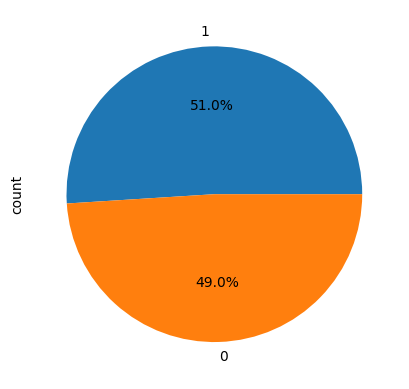

In [21]:
y.value_counts().plot(kind = 'pie', autopct='%1.1f%%')

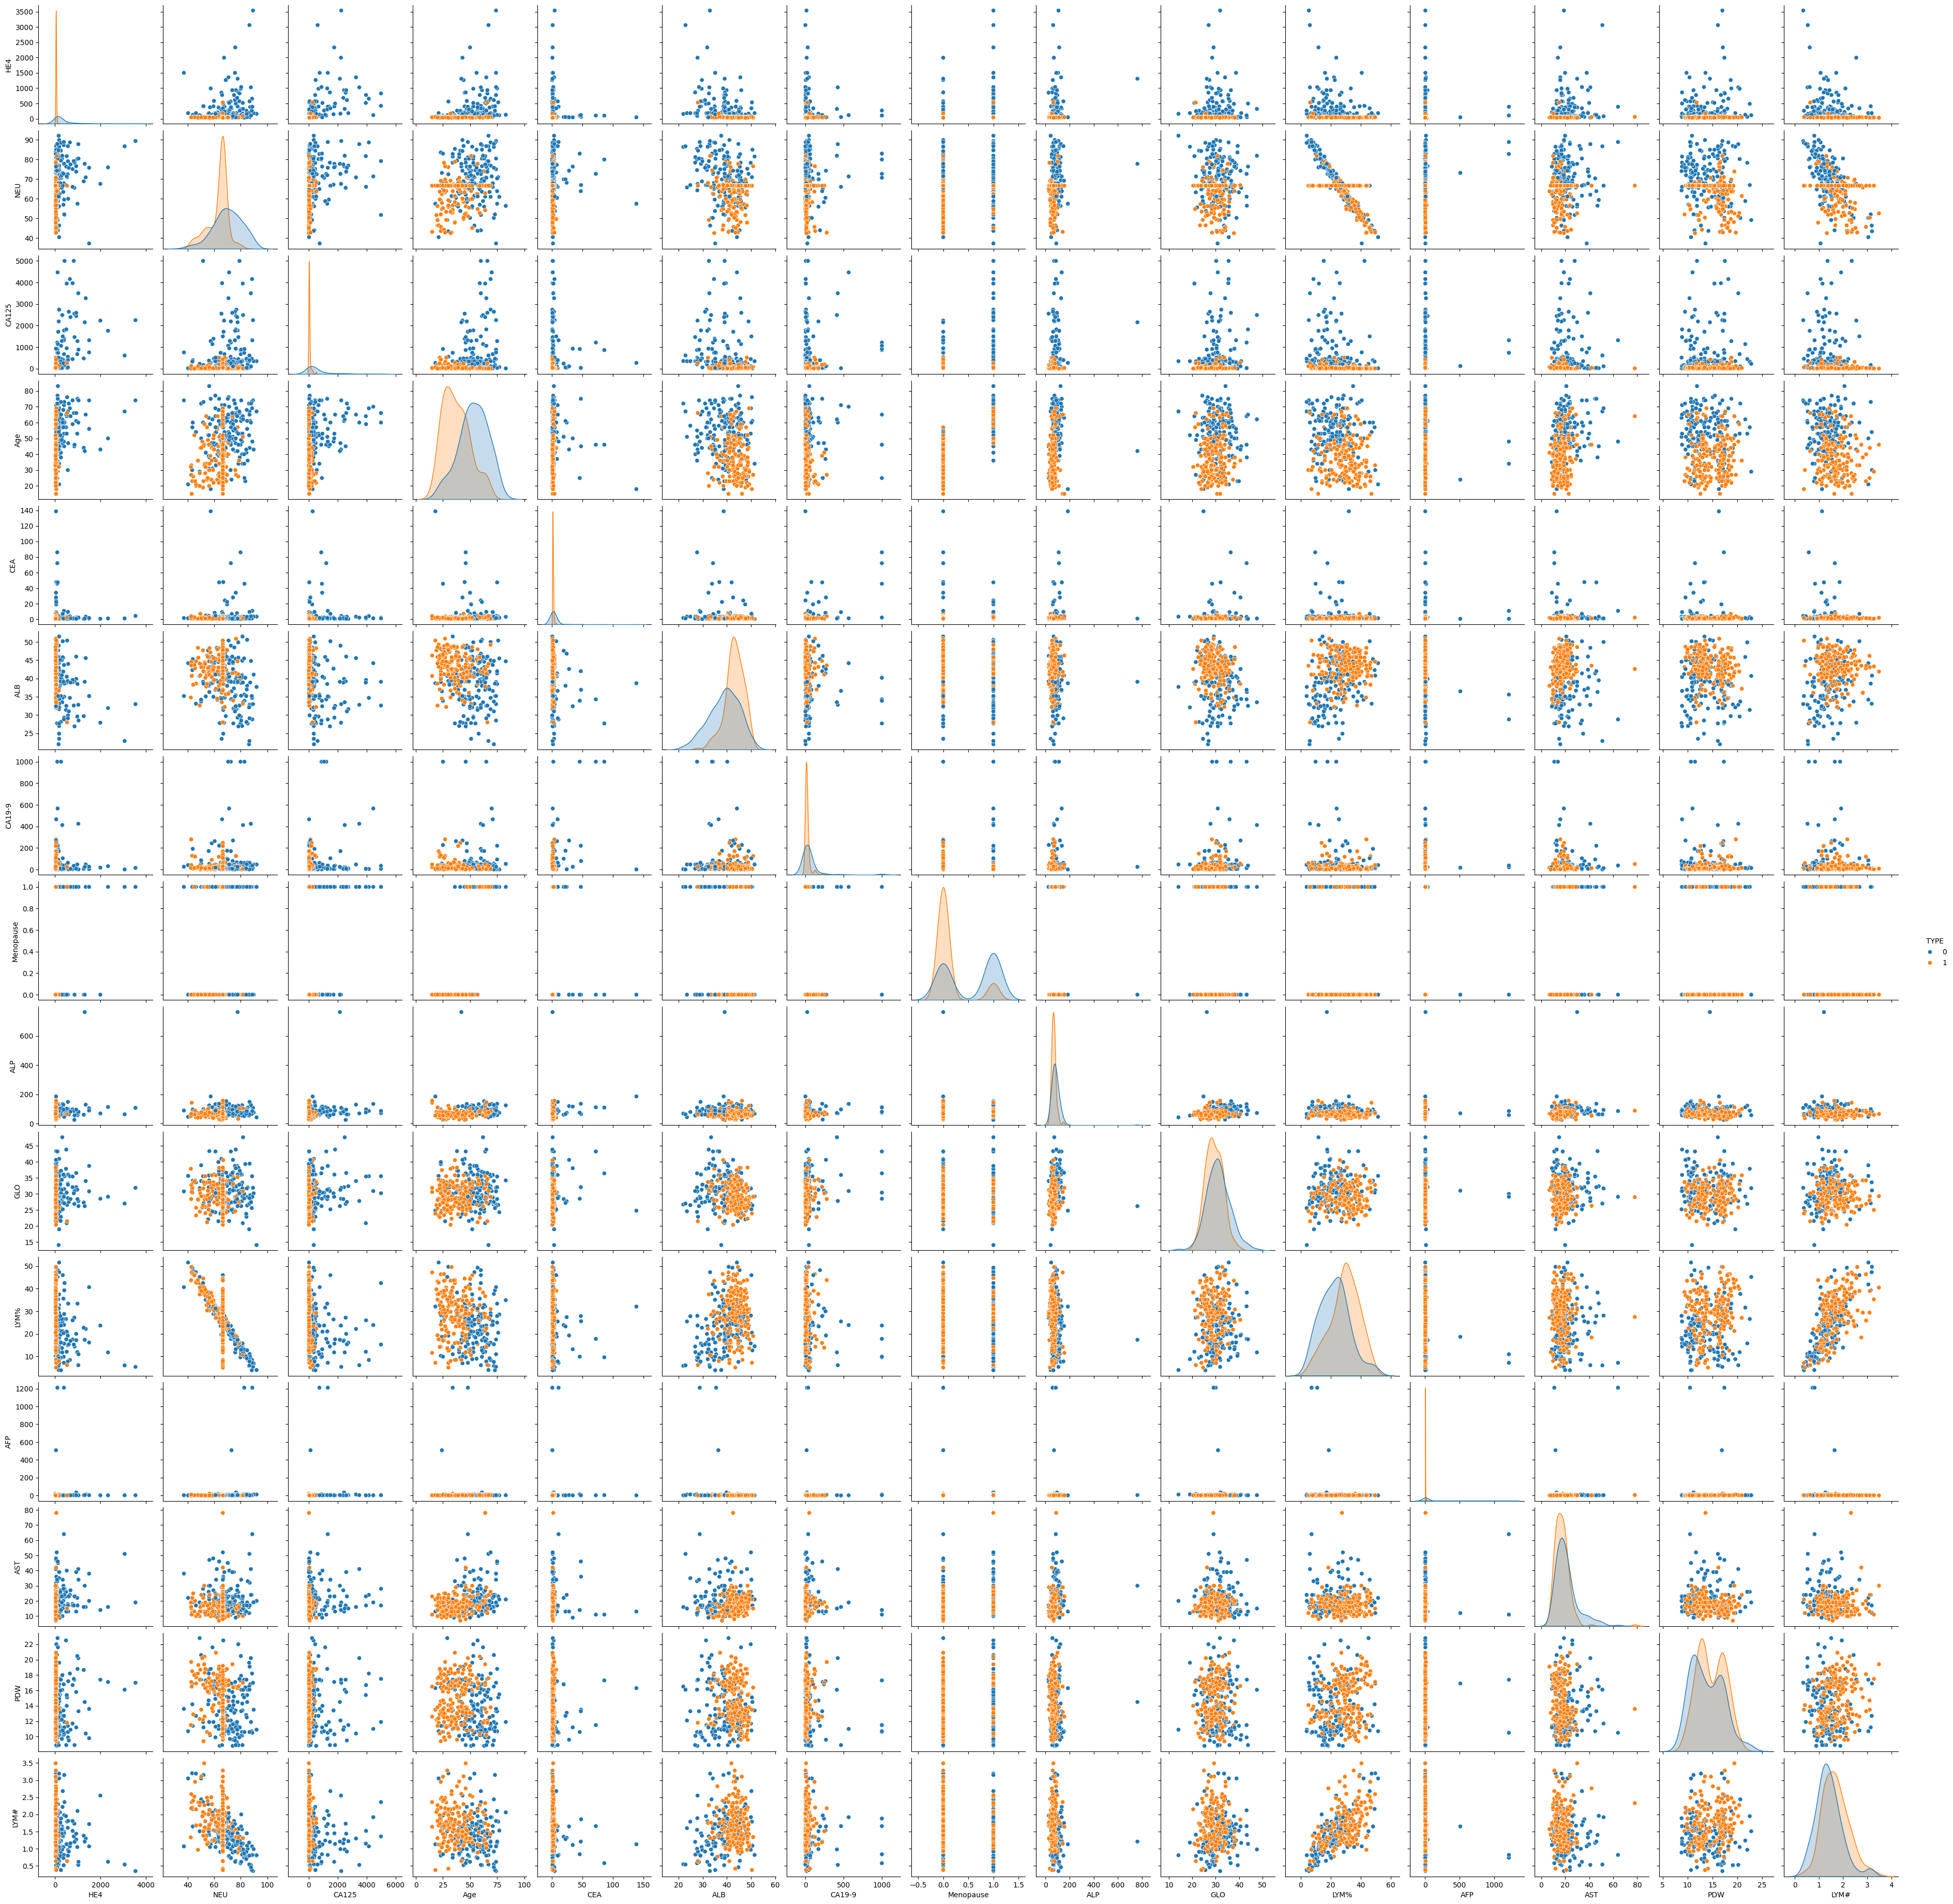

In [22]:
X_sel_copy = X_select.copy()
X_sel_copy['TYPE'] = y
sns.pairplot(X_sel_copy,hue='TYPE')

<Axes: >

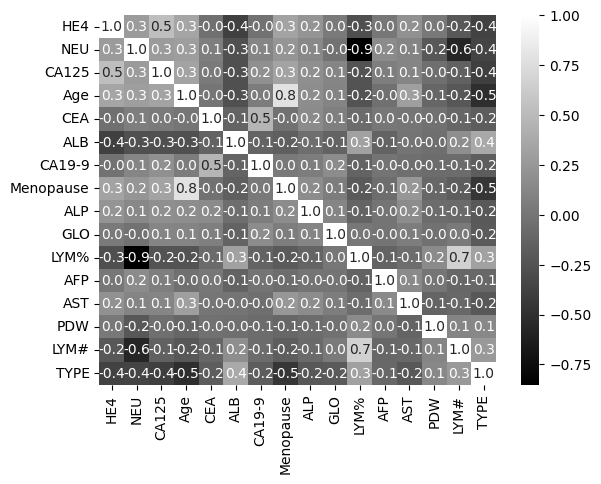

In [23]:
corr=X_sel_copy.corr()
sns.heatmap(corr,annot=True,cmap='gray',fmt='.1f')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size = 0.3, random_state = 42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
Results = pd.DataFrame(columns=['Base Model', 'Accuracy'])

### Logestic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
y_pred_LR = modelLR.predict(X_test)
accuracy = modelLR.score(X_test, y_test)
print(classification_report(y_test, y_pred_LR))

new_result = pd.DataFrame({'Base Model': ["Logistic Regression"], 'Accuracy': [accuracy]})
Results = pd.concat([Results, new_result], ignore_index=True)
print(Results)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        53
           1       0.75      0.90      0.82        52

    accuracy                           0.80       105
   macro avg       0.81      0.80      0.80       105
weighted avg       0.81      0.80      0.80       105

            Base Model  Accuracy
0  Logistic Regression       0.8


### SVM

In [27]:
from sklearn.svm import SVC
modelSVM = SVC(C= 10, decision_function_shape= 'ovo', degree= 4, kernel= 'poly',gamma=5)
modelSVM.fit(X_train, y_train)
y_pred_SVM = modelSVM.predict(X_test)
accuracy = modelSVM.score(X_test, y_test)
print(classification_report(y_test, y_pred_SVM))

new_result = pd.DataFrame({'Base Model': ["SVM"], 'Accuracy': [accuracy]})
Results = pd.concat([Results, new_result], ignore_index=True)
print(Results)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        53
           1       0.76      0.85      0.80        52

    accuracy                           0.79       105
   macro avg       0.79      0.79      0.79       105
weighted avg       0.79      0.79      0.79       105

            Base Model  Accuracy
0  Logistic Regression  0.800000
1                  SVM  0.790476


### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)
y_pred_KNN = modelKNN.predict(X_test)
accuracy = modelKNN.score(X_test, y_test)
print(classification_report(y_test, y_pred_KNN))

new_result = pd.DataFrame({'Base Model': ["KNN"], 'Accuracy': [accuracy]})
Results = pd.concat([Results, new_result], ignore_index=True)
print(Results)

              precision    recall  f1-score   support

           0       0.91      0.57      0.70        53
           1       0.68      0.94      0.79        52

    accuracy                           0.75       105
   macro avg       0.79      0.75      0.74       105
weighted avg       0.80      0.75      0.74       105

            Base Model  Accuracy
0  Logistic Regression  0.800000
1                  SVM  0.790476
2                  KNN  0.752381


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
modelDecTree = KNeighborsClassifier()
modelDecTree.fit(X_train, y_train)
y_pred_DecTree = modelDecTree.predict(X_test)
accuracy = modelDecTree.score(X_test, y_test)
print(classification_report(y_test, y_pred_DecTree))

new_result = pd.DataFrame({'Base Model': ["DecTree"], 'Accuracy': [accuracy]})
Results = pd.concat([Results, new_result], ignore_index=True)
print(Results)

              precision    recall  f1-score   support

           0       0.91      0.57      0.70        53
           1       0.68      0.94      0.79        52

    accuracy                           0.75       105
   macro avg       0.79      0.75      0.74       105
weighted avg       0.80      0.75      0.74       105

            Base Model  Accuracy
0  Logistic Regression  0.800000
1                  SVM  0.790476
2                  KNN  0.752381
3              DecTree  0.752381


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
modelRanFor = RandomForestClassifier(random_state=42,bootstrap= False, criterion= 'entropy',
                            max_depth= 5, max_features= 'sqrt', n_estimators= 100)
modelRanFor.fit(X_train, y_train)
y_pred_RanFor = modelRanFor.predict(X_test)
accuracy = modelRanFor.score(X_test, y_test)
print(classification_report(y_test, y_pred_RanFor))

new_result = pd.DataFrame({'Base Model': ["RanFor"], 'Accuracy': [accuracy]})
Results = pd.concat([Results, new_result], ignore_index=True)
print(Results)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        53
           1       0.86      0.96      0.91        52

    accuracy                           0.90       105
   macro avg       0.91      0.91      0.90       105
weighted avg       0.91      0.90      0.90       105

            Base Model  Accuracy
0  Logistic Regression  0.800000
1                  SVM  0.790476
2                  KNN  0.752381
3              DecTree  0.752381
4               RanFor  0.904762


### XGBoost

In [32]:
from xgboost import XGBClassifier
model_XGBoost = XGBClassifier()
model_XGBoost.fit(X_train, y_train)
y_pred_XGBoost = model_XGBoost.predict(X_test)
accuracy = model_XGBoost.score(X_test, y_test)
print(classification_report(y_test, y_pred_XGBoost))

new_result = pd.DataFrame({'Base Model': ["XGBoost"], 'Accuracy': [accuracy]})
Results = pd.concat([Results, new_result], ignore_index=True)
print(Results)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.88      0.88      0.88        52

    accuracy                           0.89       105
   macro avg       0.89      0.89      0.89       105
weighted avg       0.89      0.89      0.89       105

            Base Model  Accuracy
0  Logistic Regression  0.800000
1                  SVM  0.790476
2                  KNN  0.752381
3              DecTree  0.752381
4               RanFor  0.904762
5              XGBoost  0.885714


In [33]:
print(Results)

            Base Model  Accuracy
0  Logistic Regression  0.800000
1                  SVM  0.790476
2                  KNN  0.752381
3              DecTree  0.752381
4               RanFor  0.904762
5              XGBoost  0.885714


### AutoML